In [1]:
import numpy as np
from datetime import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
from cswNets import *

%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# proto csw: filler questions

## train and eval data

In [9]:
X_train = [[5,1,6,2,0],[5,1,6,2,1],
           [7,3,8,4,0],[7,3,8,4,1]]
Y_train = [[5],[6],[7],[8]]
X_test = X_train
Y_test = Y_train
fix_vocab_size = 5
rand_vocab_size = 4
vocab_size = fix_vocab_size + rand_vocab_size
input_seq_len = 5

### cells and architectures

In [14]:
arch = {'input_seq_len':input_seq_len,
       'output_seq_len':1,
       'celldim': vocab_size,
       'fix_vocab_size': fix_vocab_size,
       'rand_vocab_size': rand_vocab_size,
       'embed_size': vocab_size}

train_info = {'batch_size': 1,
              'num_epochs': 3000,
              'loss_op': tf.losses.mean_squared_error}

In [16]:
def run_k_experiments(net,train_info,k):
  acc_L = []
  for it in range(k):
    time1 = dt.now()
    net.reinitialize()
    eval_data = net.train(X_train,Y_train,train_info,
                          X_test,Y_test,train_info)
    acc_L.append(eval_data['accuracy'])
    print(it+1,dt.now()-time1)
  return np.array(acc_L)

In [17]:
lstm = LSTM(arch,saving=False)
rnn = RNN(arch,saving=False)

rnn_acc_L = run_k_experiments(rnn,train_info,10)
lstm_acc_L = run_k_experiments(lstm,train_info,10)

1 0:00:23.373914
2 0:00:19.353590
3 0:00:19.117551
4 0:00:19.269607
5 0:00:19.387530
6 0:00:18.941696
7 0:00:18.726553
8 0:00:19.126229
9 0:00:19.259788
10 0:00:19.497734
1 0:00:24.593006
2 0:00:24.240532
3 0:00:23.977871
4 0:00:24.943817
5 0:00:23.876688
6 0:00:23.769862
7 0:00:24.953065
8 0:00:24.009773
9 0:00:23.579801
10 0:00:23.610910


Text(0.5,1,'ACCURACY_ProtoCSW-fillerQ_rand-fillers3')

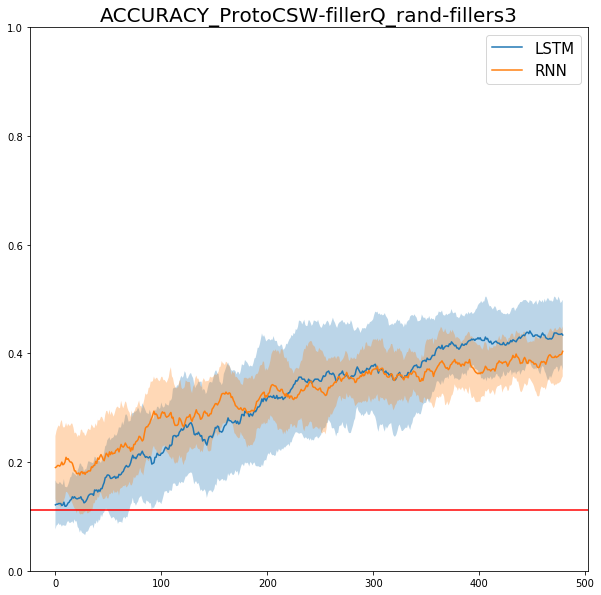

In [18]:
def mov_avg(X,wind):
  X_L = []
  for i in range(X.shape[1]-wind):
    x = np.mean(X[:,i:i+wind],1)
    X_L.append(x)
  return np.array(X_L)


plt.figure(figsize=(10,10))
plt.ylim((0,1))
mov_avg_wind = 20

M = np.mean(mov_avg(lstm_acc_L,mov_avg_wind),1)
sd = np.std(mov_avg(lstm_acc_L,mov_avg_wind),1)
plt.plot(M,label='LSTM')
plt.fill_between(range(len(M)),M-sd,M+sd,alpha=.3)
  
M = np.mean(mov_avg(rnn_acc_L,mov_avg_wind),1)
sd = np.std(mov_avg(rnn_acc_L,mov_avg_wind),1)
plt.plot(M,label='RNN')
plt.fill_between(range(len(M)),M-sd,M+sd,alpha=.3)

plt.axhline(1/(vocab_size),c='r')
plt.legend(fontsize=15)
title = 'ACCURACY_ProtoCSW-fillerQ_rand-fillers3'
plt.title(title,size=20)
# plt.savefig(title)